In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import numpy as np

In [3]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

##正距円筒図法 (plate caree, equidistant cylindrical projection)

経緯線は垂直線と等間隔の水平線で表される。経度、緯度をそのままＸ座標、Ｙ座標に読み変えた図法。赤道付近でのひずみは小さいが、赤道から離れるにつれ東西は拡大されひずみが大きくなる。地図から経緯度を読み取ることが目的であれば最も適した図法。

|keyword|説明
|---|---|
|central_longitude|地図中央の経度|

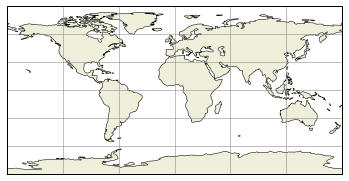

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', 
             color='gray')

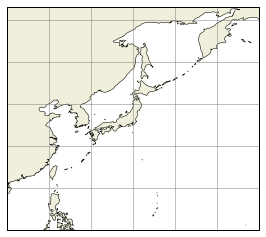

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=140.))
ax.set_extent([110,170,10,60])
ax.add_feature(land_50m)
ax.coastlines(resolution='50m', lw=0.5)
ax.gridlines(xlocs=mticker.MultipleLocator(10), 
             ylocs=mticker.MultipleLocator(10), 
             linestyle='-', 
             color='gray')

##ランベルト正角円錐図法 (LambertConformal)

緯線は同心円、経線は中心からの放射状直線で表される。緯線間隔は正角となるように補正され、頂点（極）は点で表される。割線間隔を０度にすれば、割線は１本で中心緯度と一致する。正角円錐図法は正角円筒図法（メルカトル図法）に比べて面積のひずみを小さく押えることができる。

|keyword|説明|
|---|---|
|central_longitude|中心経度。|	
|central_latitude|中心緯度。|
|standard_parallels|標準緯線。|
|cutoff|カットオフ緯度。ランベルト図法では北極から投影するので赤道より南側は描画されない。0なら北半球が、-30なら北緯30度までが描画される。デフォルトは-30。|

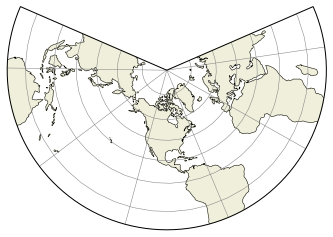

In [7]:
plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', 
             color='gray')

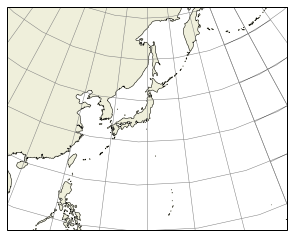

In [8]:
plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=140.0,
                                               central_latitude=30,
                                               standard_parallels=(30,60)))
ax.set_extent([110,170,10,60],ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.coastlines(resolution='50m', lw=0.5)
ax.gridlines(xlocs=mticker.MultipleLocator(10), 
             ylocs=mticker.MultipleLocator(10), 
             linestyle='-', 
             color='gray')

## メルカトル図法(Mercator)

経緯線は垂直線と水平線で表される。赤道付近でのひずみは小さくなり、経線方向のひずみと緯線方向のひずみが等しくなるように、緯線間隔を補正して正角にしている。

|keyword|説明|
|---|---|
|central_longitude|中心緯度|

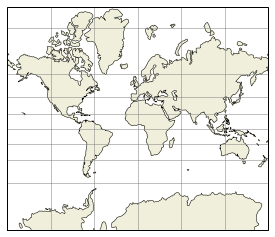

In [9]:
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', 
             color='gray')

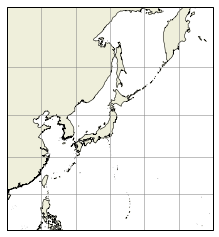

In [10]:
plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=140.0))
ax.set_extent([110,170,10,60],ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.coastlines(resolution='10m', lw=0.5)
ax.gridlines(xlocs=mticker.MultipleLocator(10), 
             ylocs=mticker.MultipleLocator(10), 
             linestyle='-', 
             color='gray')

## 正射方位図法(Orthographic)

地球の無限遠方に光源を置いて平面に投影する図法。中心位置から見て半球を投影できる。

|keyword|説明|
|---|---|
|central_longitude|中心緯度|
|central_latitude|中心経度|

cartopyの場合は、(緯度, 経度) = (central_latitude, central_longitude) で表した点を中心とした半球を投影する。

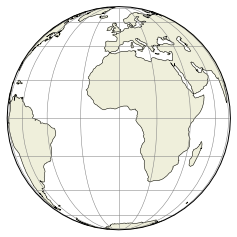

In [11]:
plt.figure()
ax = plt.axes(projection=ccrs.Orthographic())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', 
             color='gray')

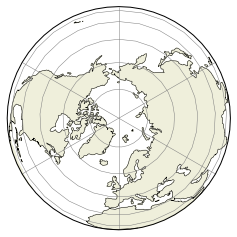

In [12]:
plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=90))
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', 
             color='gray')

## 平射方位図法, ステレオ図法(Stereographic, NorthPolarStereo, SouthPolarStereo)

投影面と反対側の地表に光源を置いて平面に投影する図法。半球を投影できる。中心から離れると距離と面積が拡大されていくが、正角図法なので部分ごとに見れば形状は正しくなる。半球の投影に適している。北極や南極を中心にして使うことがほとんどなので、NorthPolarStereoかSouthPolarStereoを使う。

|keyword|説明|
|---|---|
|central_latitude|中心緯度。Stereographicのみ。|
|central_longitude|中心経度|

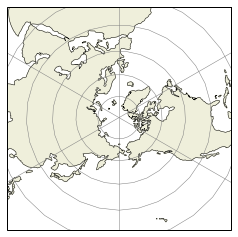

In [13]:
plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-180))
ax.set_extent([-180,180,20,90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', 
             color='gray')

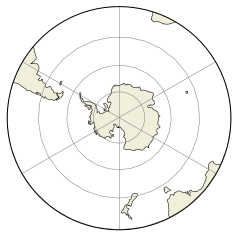

In [14]:
plt.figure()
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180,180,-90,-30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', 
             color='gray')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)